
# <p style="text-align: center; margin-bottom: 0cm;">An analysis of the Daley-Kendal model using agent-based models.</p>

#### <p style="text-align: center; margin-bottom: -1cm;">Lowell Monis</p>
#### <p style="text-align: center;">November 19, 2024</p>

***

This project has been completed in fulfillment of the requirements for an Honors Citation in Computational Mathematics, Sciences, and Engineering 202, Computational Modeling Tools and Techniques, taught by Dr. Nathan Haut during the Fall of 2024.

***

## Preamble

***

This study will make use of the following Python modules, libraries, and packages. It is essential to run the following cell to avoid running into errors while viewing this notebook. The following cell also contains setup commands for styles that may be used in the notebook.

***

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, fixed, IntSlider, HBox, VBox, Button, Output
import time
from IPython.display import display, clear_output

In [2]:
def daley_kendal(time, y, beta, gamma):
    """
    Sets up the Daley-Kendal ordinary differential equation system to model the spread of rumors in an isolated environment.

    Args:
        time: array-like, time stamps to iterate over.
        y: array-like, initial values for the three variables, namely respective fractions of ignorants (I), spreaders (S), and stiflers (R).
        beta: float, interaction rate as a percentage.
        gamma: float, stifling rate as a percentage.

    returns:
        diffs: array-like, list of results from the application of the differential equations.
    """
    I, S, R = y
    dI_dt = -beta * I * S
    dS_dt = beta * I * S - gamma * S
    dR_dt = gamma * S

    diffs = [dI_dt, dS_dt, dR_dt]
    
    return diffs

In [3]:
# Parameters
beta = 0.3
gamma = 0.1

# Initial conditions: [I, S, R]
I0 = 0.5
S0 = 0.1
R0 = 0.0
initial_conditions = [I0, S0, R0]

# Creating time points
time = np.linspace(0, 100, 1000)

In [4]:
solution = solve_ivp(daley_kendal, (0, 100), initial_conditions, t_eval = time, args=(beta, gamma))
I, S, R = solution.y  # To extract each variable

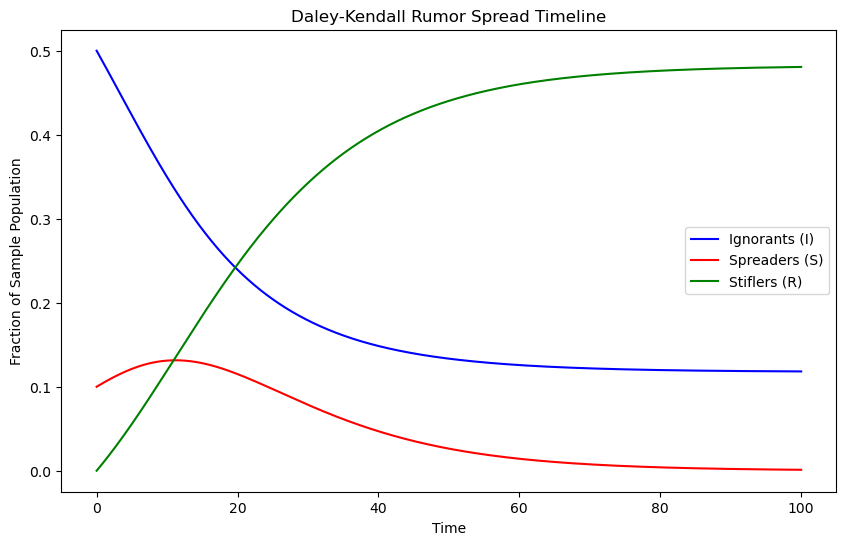

In [6]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, I, label="Ignorants (I)", color="blue")
plt.plot(time, S, label="Spreaders (S)", color="red")
plt.plot(time, R, label="Stiflers (R)", color="green")
plt.title("Daley-Kendall Rumor Spread Timeline")
plt.xlabel("Time")
plt.ylabel("Fraction of Sample Population")
plt.legend()
plt.show()

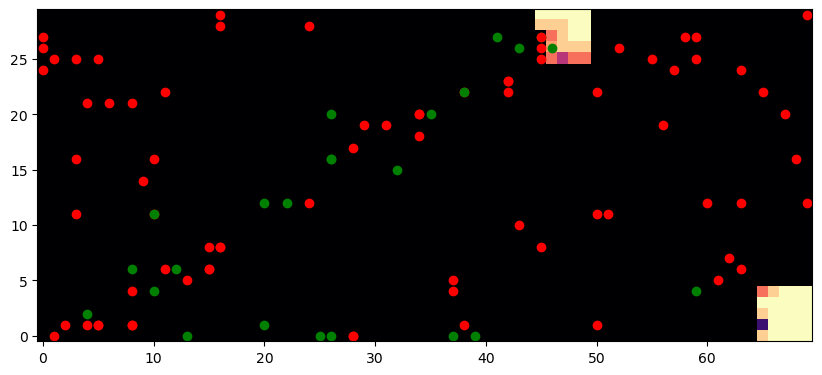

<Figure size 1000x500 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import random
import numpy as np
from IPython.display import display, clear_output
import time


class Ant:
    """
    Ant class.

    Each has an x and y location in a 2D grid.
    Each ant also knows whether or not it is currently
    in possession of food.

    Attributes
    ----------

    x : int
        x position in the 2D grid

    y : int
        y position in the 2D grid

    has_food : bool
        whether or not the ant is currently in possession of food

    Methods
    -------
    __init__(x_dim, y_dim)
        Initialize an ant in a random location within
        the bounds of the grid as defined by x_dim and y_dim.
        Start the ant off without food.

    head_home()
        If the ant has any has food, it should head "home" (0,0)

    THE REST OF THIS DOCSTRING IS INCOMPLETE! You should finish it!

    """

    def __init__(self, x_dim, y_dim):
        """
        Initialize an ant in a random location within
        the bounds of the grid as defined by x_dim and y_dim.
        Start the ant off without food.
            
        Parameters
        ----------
        
        x_dim : int
            the extent of the grid in the x-direction
                
        y_dim : int
             the extent of the grid in the x-direction
        """
        self.x = np.random.randint(0, x_dim)
        self.y = np.random.randint(0, y_dim)
        self.has_food = False

    def move(self, smell, food):
        """
        Move the ant.
    
        If the ant has food, it releases a strong scent in its current position
        and heads back home (to the origin). If it doesn't have food, the ant
        searches for food by following a scent gradient, or moves randomly if no
        scent is detected.
    
        Parameters
        ----------
        smell : numpy.ndarray
            A 2D array representing the scent intensity across the grid.
    
        food : numpy.ndarray
            A 2D array representing the quantity of food in each cell.
        """
        if self.has_food == True:
            smell[self.x, self.y] += 100
            self.head_home()
        else:
            self.search_for_food(smell)
        if food[self.x, self.y] > 0:
            food[self.x, self.y] -= 1
            self.has_food = True

    def head_home(self):
        """
        Direct the ant to move towards home (0, 0).
    
        The ant will take a step closer to the home position in either the x
        or y direction. If the ant is already at home (0, 0), it will drop the
        food and be marked as no longer carrying food.
        """
        x = self.x
        y = self.y

        if (x == 0) and (y == 0):
            self.has_food = False;
            return

        pick = np.zeros(x + y)
        pick[0:x] = 1
        if (np.random.choice(pick) == 1):
            x = x - 1
        else:
            y = y - 1

        if (x < 0):
            x = 0
        if (y < 0):
            y = 0

        self.x = x
        self.y = y

    def search_for_food(self, smell):
        """
        Search for food based on the scent gradient.
    
        The ant will try to move towards regions of stronger scent. If no scent is
        detected in its immediate surroundings, it will move randomly in one of
        four directions (up, left, down, or right).
    
        Parameters
        ----------
        smell : numpy.ndarray
            A 2D array representing the scent intensity across the grid.
        """
        x = self.x
        y = self.y

        x_dim = smell.shape[0]
        y_dim = smell.shape[1]

        directions = ['up', 'left', 'down', 'right']
        # First check to see if there is food up and to the right.
        g = []  # follow gradient
        m = []

        if (x + 1 < smell.shape[0]):
            if (smell[x + 1, y] > 0):
                m.append(smell[x + 1, y])
                g.append('right')
        if (y + 1 < smell.shape[1]):
            if (smell[x, y + 1] > 0):
                m.append(smell[x, y + 1])
                g.append('up')
        if (g != []):
            grad = g[m.index(max(m))]
            # print("Following smell", grad)
        else:
            # else just pick a random direction.
            grad = random.choice(directions)
            # print("Choosing ",grad)

        # move the ant
        if (grad == 'up'):
            y = y + 1
        elif (grad == 'right'):
            x = x + 1
        elif (grad == 'down'):
            y = y - 1
        elif (grad == 'left'):
            x = x - 1
        else:
            print(grad)
            print("ERROR!!a!!!!!!!!!!")

        # make sure we don't go off the grid.
        if (x < 0):
            x = 0
        if (y < 0):
            y = 0
        if (x > x_dim - 1):
            x = x_dim - 1
        if (y > y_dim - 1):
            y = y_dim - 1
        self.x = x
        self.y = y

    def draw(self):
        """ Draw the ants on the board."""
        color = 'r'
        if (self.has_food == True):
            color = 'g'
        plt.scatter(self.x, self.y, color=color)


def run(num_ants=100, x_dim=70, y_dim=30):
    smell = np.zeros((x_dim, y_dim))
    food = np.zeros((x_dim, y_dim))

    # place food
    food[45:50, 25:30] = 10
    food[45:50, 25:30] = 10
    food[65:70, 0:5] = 10

    ants = [Ant(x_dim, y_dim) for a in range(0, num_ants)]

    fig, ax = plt.subplots(figsize=(10, 5))

    # Main simulation loop
    for i in range(0, 100):

        # Loop over ants
        for a in ants:
            a.move(smell, food)

        smell = smell - 1
        smell[smell < 0] = 0

        # plot world
        plt.imshow(food.T, origin='lower', aspect='equal', cmap="magma")
        for a in range(0, num_ants):
            ants[a].draw()

        # Animaiton part (dosn't change)
        clear_output(wait=True)  # Clear output for dynamic display
        display(fig)  # Reset display
        fig.clear()  # Prevent overlapping and layered plots
        time.sleep(0.0001)  # Sleep for a fraction of a second to allow animation to catch up
run()

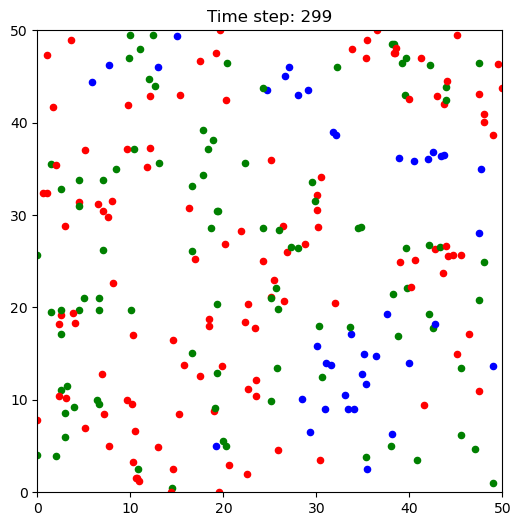

In [15]:
interaction_threshold = 1.0  # Distance threshold for interaction

# Define Agent class
class Agent:
    def __init__(self, grid_size, tendency):
        self.x = random.uniform(0, grid_size)
        self.y = random.uniform(0, grid_size)
        self.memory = random.randint(10,500)
        self.remember = 0
        self.max_time = 0
        self.tendency = tendency
        self.state = "ignorant"  # Initial state
        self.social_factor = random.choice([-1, 0, 1])  # Introvert, ambivert, extrovert
        self.in_conversation = None  # Tracks current conversation partner
        self.conversation_timer = 0  # Tracks conversation duration

    def move(self, grid_size):
        if self.in_conversation is None:  # Only move if not in a conversation
            directions = ["up", "down", "left", "right"]
            move = random.choice(directions)
            if move == "up":
                self.y = min(grid_size, self.y + 0.5)
            elif move == "down":
                self.y = max(0, self.y - 0.5)
            elif move == "left":
                self.x = max(0, self.x - 0.5)
            elif move == "right":
                self.x = min(grid_size, self.x + 0.5)

    def crave_interaction(self, others):
        # Seek a partner for conversation
        for other in others:
            if other is not self and other.in_conversation is None:  # Free agents only
                distance = np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
                if distance < interaction_threshold:  # Close enough to interact
                    interaction_likelihood = self.social_factor * other.social_factor
                    if interaction_likelihood == 0:
                        self.max_time = 2
                        self.in_conversation = other
                        other.in_conversation = self
                        self.conversation_timer = 0  # Start the conversation
                        other.conversation_timer = 0
                    elif interaction_likelihood == 1:
                        self.max_time = 5
                        self.in_conversation = other
                        other.in_conversation = self
                        self.conversation_timer = 0  # Start the conversation
                        other.conversation_timer = 0

    def interact(self):
        if self.in_conversation:
            partner = self.in_conversation
            # Increment conversation timer
            self.conversation_timer += 1
            partner.conversation_timer += 1

            # Interaction logic based on Daley-Kendall model
            if self.state == "ignorant" and partner.state == "spreader":
                if self.tendency == 1:
                    self.state = "spreader"
                    return
                else:
                    self.state = "stifler"
                    return
            elif self.state == "spreader" and partner.state == "ignorant":
                if partner.tendency == 1:
                    partner.state = "spreader"
                else:
                    partner.state = "stifler"
                    return
            elif self.state == "ignorant" and self.state == "ignorant":
                self.leave_conversation()
                return
            elif self.state == "stifler" and self.state == "stifler":
                self.leave_conversation()
                return
            elif self.state == "spreader" and self.state == "spreader":
                self.leave_conversation()
                return
            elif self.state == "ignorant" and self.state == "stifler":
                self.leave_conversation()
                return
            elif self.state == "stifler" and self.state == "ignorant":
                self.leave_conversation()
                return
            # End conversation if maximum time is reached or states differ
            if self.conversation_timer >= self.max_time:
                self.leave_conversation()
                return

    def leave_conversation(self):
        if self.in_conversation:
            partner = self.in_conversation
            self.in_conversation = None
            partner.in_conversation = None
            self.conversation_timer = 0
            partner.conversation_timer = 0
    
    def memory_update(self):
        if self.state == "spreader":
            self.remember += 1
            if self.remember == self.memory:
                self.state = "stifler"

# Simulation function
def simulate_rumor_spread(gamma, num_agents=250, grid_size=50, timesteps=300):
    agents = [Agent(grid_size, tendency=1) for _ in range(num_agents)]
    stiflers = random.sample([agent for agent in agents], int(gamma*num_agents))
    for stifler in stiflers:
        stifler.tendency = 0
    # Initialize multiple spreaders with high social factor
    spreaders = random.sample([agent for agent in agents if agent.social_factor > 0 and agent.tendency == 1], int(num_agents*0.1))
    for spreader in spreaders:
        spreader.state = "spreader"

    # Define state colors for visualization
    state_colors = {"ignorant": "blue", "spreader": "red", "stifler": "green"}

    # Simulation loop
    for t in range(timesteps):
        for agent in agents:
            if agent.in_conversation is None:
                agent.move(grid_size)
                agent.crave_interaction(agents)
                agent.memory_update()
            else:
                agent.interact()
                agent.memory_update()

        # Visualization
        plt.figure(figsize=(6, 6))
        plt.xlim(0, grid_size)
        plt.ylim(0, grid_size)
        for agent in agents:
            plt.scatter(agent.x, agent.y, color=state_colors[agent.state], s=20)
        plt.title(f"Time step: {t}")
        clear_output(wait=True)
        display(plt.gcf())
        plt.close()

        time.sleep(0.1)

# Run the simulation
simulate_rumor_spread(gamma=gamma)


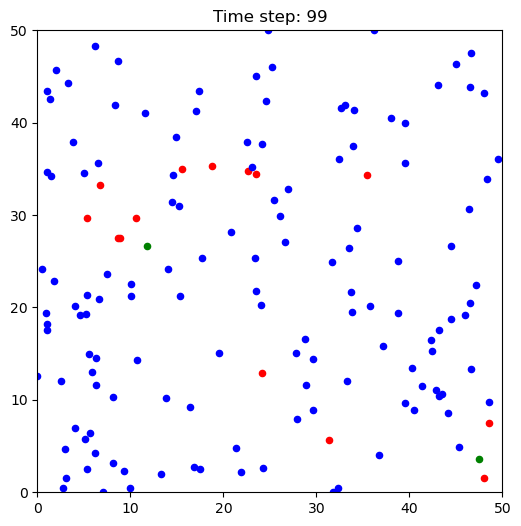

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display, clear_output
import time

# Define parameters
beta = 0.3   # Rate of ignorant-spreader interaction
gamma = 0.1  # Rate of spreader-stifler transition
phi = 0.05   # External influence reducing ignorants
psi = 0.02   # Saturation effects reducing spreaders
interaction_threshold = 1.0  # Distance threshold for interaction
conversation_limit = 5  # Maximum time-steps a conversation lasts

# Define the Agent class
class Agent:
    def __init__(self, grid_size):
        self.x = random.uniform(0, grid_size)
        self.y = random.uniform(0, grid_size)
        self.state = "ignorant"  # Initial state
        self.social_factor = random.uniform(0.1, 0.9)  # Likelihood to seek interaction
        self.in_conversation = None  # Tracks current conversation partner
        self.conversation_timer = 0  # Tracks how long a conversation lasts

    def move(self, grid_size):
        if self.in_conversation is None:  # Only move if not in a conversation
            directions = ["up", "down", "left", "right"]
            move = random.choice(directions)
            if move == "up":
                self.y = min(grid_size, self.y + 0.5)
            elif move == "down":
                self.y = max(0, self.y - 0.5)
            elif move == "left":
                self.x = max(0, self.x - 0.5)
            elif move == "right":
                self.x = min(grid_size, self.x + 0.5)

    def crave_interaction(self, others):
        # Seek a partner for conversation based on social factor
        for other in others:
            if other is not self and other.in_conversation is None:  # Free agents only
                distance = np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
                if distance < interaction_threshold:  # Close enough to interact
                    interaction_likelihood = self.social_factor * other.social_factor
                    if random.random() < interaction_likelihood:
                        self.in_conversation = other
                        other.in_conversation = self
                        self.conversation_timer = conversation_limit
                        other.conversation_timer = conversation_limit
                        return

    def interact(self):
        if self.in_conversation:
            partner = self.in_conversation
            # Interaction dynamics based on extended Daley-Kendall model
            if self.state == "ignorant":
                if partner.state == "spreader" and random.random() < beta:
                    self.state = "spreader"
            elif self.state == "spreader":
                if partner.state == "ignorant" and random.random() < beta:
                    partner.state = "spreader"
                if partner.state == "spreader" and random.random() < gamma:
                    self.state = "stifler"
                if random.random() < psi:  # Saturation effect
                    self.state = "stifler"
            elif self.state == "ignorant" and random.random() < phi:
                self.state = "stifler"  # External influence
            # Reduce conversation timer
            self.conversation_timer -= 1
            partner.conversation_timer -= 1
            # End conversation if states change or timer reaches 0
            if self.state != "ignorant" or partner.state != "ignorant" or self.conversation_timer <= 0:
                self.leave_conversation()

    def leave_conversation(self):
        if self.in_conversation:
            partner = self.in_conversation
            # Move in opposite directions
            dx = self.x - partner.x
            dy = self.y - partner.y
            self.x += np.sign(dx) * 0.5
            self.y += np.sign(dy) * 0.5
            partner.x -= np.sign(dx) * 0.5
            partner.y -= np.sign(dy) * 0.5
            # End conversation
            self.in_conversation = None
            partner.in_conversation = None

# Simulation function
def simulate_social_rumor_spread(num_agents=150, grid_size=50, timesteps=100):
    agents = [Agent(grid_size) for _ in range(num_agents)]
    agents[0].state = "spreader"  # Start with one spreader
    agents[2].state = "spreader"  # Start with one spreader
    agents[3].state = "spreader"  # Start with one spreader
    agents[4].state = "spreader"  # Start with one spreader
    agents[5].state = "spreader"  # Start with one spreader
    agents[6].state = "spreader"  # Start with one spreader
    agents[7].state = "spreader"  # Start with one spreader
    agents[1].state = "spreader"  # Start with one spreader

    # Define state colors for visualization
    state_colors = {"ignorant": "blue", "spreader": "red", "stifler": "green"}

    # Simulation loop
    for t in range(timesteps):
        for agent in agents:
            if agent.in_conversation is None:
                agent.move(grid_size)
                agent.crave_interaction(agents)
            else:
                agent.interact()

        # Visualization
        plt.figure(figsize=(6, 6))
        plt.xlim(0, grid_size)
        plt.ylim(0, grid_size)
        for agent in agents:
            plt.scatter(agent.x, agent.y, color=state_colors[agent.state], s=20)
        plt.title(f"Time step: {t}")
        clear_output(wait=True)
        display(plt.gcf())
        plt.close()

        time.sleep(0.01)

# Run the simulation
simulate_social_rumor_spread()


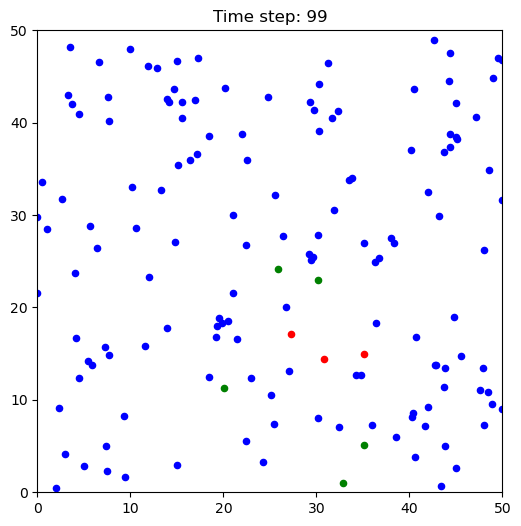

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display, clear_output
import time

# Define parameters
beta = 0.3   # Rate of ignorant-spreader interaction
gamma = 0.1  # Rate of spreader-stifler transition
phi = 0.05   # External influence reducing ignorants
psi = 0.02   # Saturation effects reducing spreaders
interaction_threshold = 1.0  # Distance threshold for interaction
conversation_limit = 5  # Maximum time-steps a conversation lasts

# Define the Agent class
class Agent:
    def __init__(self, grid_size):
        self.x = random.uniform(0, grid_size)
        self.y = random.uniform(0, grid_size)
        self.state = "ignorant"  # Initial state
        self.social_factor = random.uniform(0.1, 1.0)  # Likelihood to interact
        self.in_conversation = None
        self.conversation_timer = 0

    def move(self, grid_size):
        if self.in_conversation is None:  # Only move if not in a conversation
            directions = ["up", "down", "left", "right"]
            move = random.choice(directions)
            if move == "up":
                self.y = min(grid_size, self.y + 0.5)
            elif move == "down":
                self.y = max(0, self.y - 0.5)
            elif move == "left":
                self.x = max(0, self.x - 0.5)
            elif move == "right":
                self.x = min(grid_size, self.x + 0.5)

    def crave_interaction(self, others):
        # Seek a partner for conversation based on social factor
        for other in others:
            if other is not self and other.in_conversation is None:  # Free agents only
                distance = np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
                if distance < interaction_threshold:  # Close enough to interact
                    interaction_likelihood = self.social_factor * other.social_factor
                    if random.random() < interaction_likelihood:
                        self.in_conversation = other
                        other.in_conversation = self
                        self.conversation_timer = conversation_limit
                        other.conversation_timer = conversation_limit
                        return

    def interact(self):
        if self.in_conversation:
            partner = self.in_conversation
            # Interaction dynamics based on ISS model
            if self.state == "ignorant":
                if partner.state == "spreader" and random.random() < beta:
                    self.state = "spreader"
            elif self.state == "spreader":
                if partner.state == "ignorant" and random.random() < beta:
                    partner.state = "spreader"
                if random.random() < gamma:  # Transition to stifler
                    self.state = "stifler"
                if random.random() < psi:  # Saturation effect
                    self.state = "stifler"

            # Reduce conversation timer
            self.conversation_timer -= 1
            partner.conversation_timer -= 1
            # End conversation if timer reaches 0
            if self.conversation_timer <= 0:
                self.leave_conversation()

    def leave_conversation(self):
        if self.in_conversation:
            partner = self.in_conversation
            self.in_conversation = None
            partner.in_conversation = None

# Simulation function
def simulate_iss_model(num_agents=150, grid_size=50, timesteps=100):
    agents = [Agent(grid_size) for _ in range(num_agents)]
    # Assign initial spreaders based on social factor
    for agent in random.sample(agents, 5):  # Set 5 initial spreaders
        agent.state = "spreader"

    # Define state colors for visualization
    state_colors = {"ignorant": "blue", "spreader": "red", "stifler": "green"}

    # Simulation loop
    for t in range(timesteps):
        for agent in agents:
            if agent.in_conversation is None:
                agent.move(grid_size)
                agent.crave_interaction(agents)
            else:
                agent.interact()

        # Visualization
        plt.figure(figsize=(6, 6))
        plt.xlim(0, grid_size)
        plt.ylim(0, grid_size)
        for agent in agents:
            plt.scatter(agent.x, agent.y, color=state_colors[agent.state], s=20)
        plt.title(f"Time step: {t}")
        clear_output(wait=True)
        display(plt.gcf())
        plt.close()

        time.sleep(0.01)

# Run the simulation
simulate_iss_model()


In [1]:
class AgentWithCheckers(Agent):
    def interact(self):
        if self.in_conversation:
            partner = self.in_conversation
            # Interaction dynamics for checkers
            if self.state == "checker" and partner.state == "spreader":
                partner.state = "stifler"  # Checker neutralizes spreader
            elif self.state == "ignorant":
                if partner.state == "spreader" and random.random() < beta:
                    if self.social_factor > 0.8:  # High social factor ignorants become checkers
                        self.state = "checker"
                    else:
                        self.state = "spreader"
            elif self.state == "spreader":
                if partner.state == "ignorant" and random.random() < beta:
                    if partner.social_factor > 0.8:
                        partner.state = "checker"
                    else:
                        partner.state = "spreader"
                if random.random() < gamma:  # Transition to stifler
                    self.state = "stifler"
                if random.random() < psi:  # Saturation effect
                    self.state = "stifler"

            self.conversation_timer -= 1
            partner.conversation_timer -= 1
            if self.conversation_timer <= 0:
                self.leave_conversation()

# Updated Simulation Function
def simulate_issc_model(num_agents=150, grid_size=50, timesteps=200):
    agents = [AgentWithCheckers(grid_size) for _ in range(num_agents)]
    for agent in random.sample(agents, 10):  # Set 5 initial spreaders
        agent.state = "spreader"
     # Define state colors for visualization
    state_colors = {"ignorant": "blue", "spreader": "red", "stifler": "green", "checker": "orange"}

    for t in range(timesteps):
        for agent in agents:
            if agent.in_conversation is None:
                agent.move(grid_size)
                agent.crave_interaction(agents)
            else:
                agent.interact()

        plt.figure(figsize=(6, 6))
        plt.xlim(0, grid_size)
        plt.ylim(0, grid_size)
        for agent in agents:
            plt.scatter(agent.x, agent.y, color=state_colors[agent.state], s=20)
        plt.title(f"Time step: {t}")
        clear_output(wait=True)
        display(plt.gcf())
        plt.close()


# Run the simulation
simulate_issc_model()


NameError: name 'Agent' is not defined

include checker
include 2 minute limit